# Answers to exercise 1.1
## Most code borrowed from Veronica

Importing different needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image 

## Explore an image from the dataset

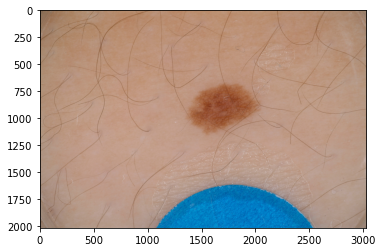

In [2]:
# Load an image and display it

im = plt.imread('../data/example_image/ISIC_0001769.jpg')
plt.imshow(im)

In [3]:
#A color image is a array with 3 dimensions (x, y, R-G-B color channels) of integers

print(im.shape)
print(im.dtype)

#Other packages might wrap the image in a different class - you are allowed to use those if you want

(2016, 3024, 3)
uint8


[  0 121 196]


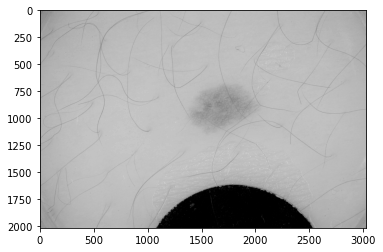

In [4]:
# Get a single RGB value from the blue circle (marker used by dermatologist)
print(im[2000,2000,:])

# Show only the red channel
plt.imshow(im[:,:,0], cmap='gray')

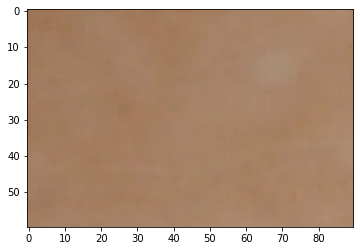

In [5]:
# Display only a part of the image

im_part = im[60:120,130:220,:]
plt.imshow(im_part)

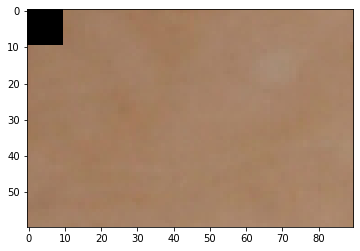

In [6]:
# Modify the image by setting some pixels to black

im_copy = im_part.copy()


im_copy[0:10,0:10,:] = np.tile(0, [10, 10, 3])
plt.imshow(im_copy)

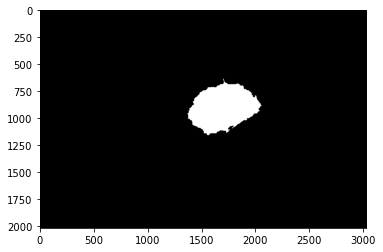

In [7]:
# Load the mask and display it

mask= plt.imread('../data/example_segmentation/ISIC_0001769_segmentation.png')
plt.imshow(mask, cmap='gray')


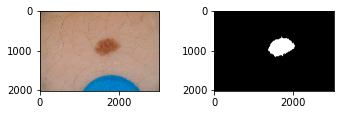

In [8]:
# Show image and mask side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im)
axes[1].imshow(mask, cmap='gray')
fig.tight_layout()

(3024, 2016)


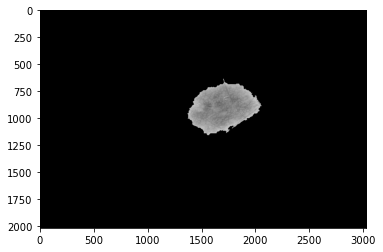

In [9]:
# Show the images overlayed, for this we can use PIL 


# Load images as Image objects  
img1 = Image.open('../data/example_image/ISIC_0001769.jpg') 
img2 = Image.open('../data/example_segmentation/ISIC_0001769_segmentation.png') 

# Overlay - more options such as transparency should be available here  
img2.paste(img1, (0,0), mask = img2) 

#Display
plt.imshow(img2, cmap='gray')

# Note that this is a single channel image
print(img2.size)   

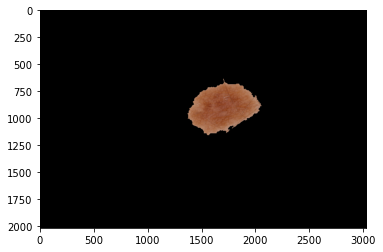

In [10]:
# Alternative: replace the non-lesion pixels

img1 = im.copy()
img1[mask==0] = 0
  
# Display 
plt.imshow(img1)

# You can use any package you prefer, but beware you might need to convert between formats

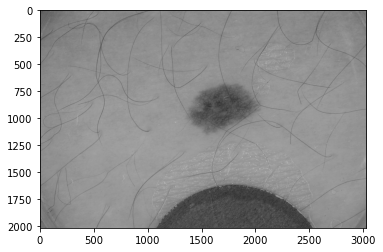

In [11]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

img1 = plt.imread('../data/example_image/ISIC_0001769.jpg')
gray = rgb2gray(img1)

plt.imshow(gray, cmap='gray')

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 30.8695,  53.1626,  75.4557,  97.7488, 120.0419, 142.335 ,
        164.6281, 186.9212, 209.2143, 231.5074, 253.8005]),
 <a list of 3024 Lists of Patches objects>)

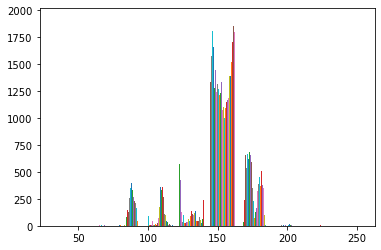

In [12]:
plt.hist(gray)

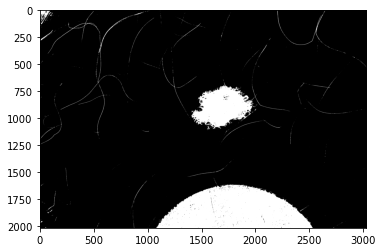

In [13]:
img2 = gray < 120
plt.imshow(img2, cmap='gray')

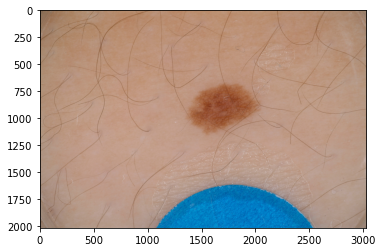

In [14]:
plt.imshow(img1)

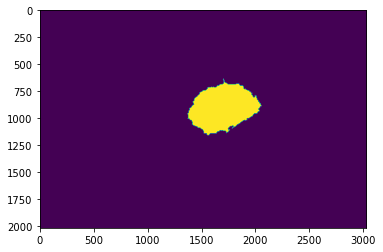

In [15]:
plt.imshow(mask)

In [23]:
print(im[800,1600,:])
img1_copy = img1.copy()


img1_copy[mask == 0] = np.tile(0,img1[800,1600,:])
plt.imshow(im_copy)

[155  87  52]


ValueError: shape mismatch: value array of shape (155,87,52) could not be broadcast to indexing result of shape (5880224,3)

In [ ]:
#one can also simply replace all BUT the lession colors with black
img1 = im.copy() #Copy the OG img

img1[mask==0] = 0 #where the mask is black the image should also be black (any RGB color can be used)

plt.imshow(img1)